# UMA Raw data EDA

## Import Libraries

In [22]:
# analysis
import numpy as np
import pandas as pd
import requests

# other
import warnings
import os

# visualisation libraries
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import seaborn as sns

# Notebook styling
%matplotlib inline
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})
warnings.filterwarnings("ignore")


In [23]:
def unpack_payload(df, payload_col = 'payload'):
    
    """
    This function takes a dataframe where the payload is in one column
    and creates a new column for each element in the payload
    
    ------------------------------------
    Parameters:
        df (pandas.DataFrame): DataFrame containing column with payload
        payload_col (str): column name of field containing the payload of the data
    
    Returns: (pandas.DataFrame): Dataframe with payload data in each column
    ------------------------------------
    Example:
    
    
    """
    
    # make copy of dataframe
    df = df.copy()
    
    # import literal_eval function
    from ast import literal_eval

    # make list of column headers from keys
    payload_cols = literal_eval(df['payload'].iloc[0]).keys()
    
    # add columns for each column header to dataframe
    for col in payload_cols:
        df[col] = df['payload'].apply(lambda x: literal_eval(x)[col])
        
    # remove type and payload column
    df.drop(['type', 'payload'], axis=1, inplace=True)
    
    return df


## Import Data

In [24]:
# User data
file_loc = '../../resources/data/interim/Testers.csv'
col_head = ['int_user_id', 'org', 'name', 'email', 'able_to_test', 'modes', 'purposes',
            'multi_mode', 'received_trip_diary','cittamobi_device_id', 'participant_id', 'device_id', 'ext_user_id']
# len(col_head)
df_testers = pd.read_csv(file_loc, names=col_head, skiprows=1)
df_testers = df_testers.set_index('int_user_id')
print(df_testers.shape)
df_testers.head()

(23, 12)


org              name                           email  \
int_user_id                                                                 
0               GoMetro    Justin Coetzee           justin@gometroapp.com   
1               GoMetro  Craig Rautenbach          craigsneak82@gmail.com   
2            GoAscendal      Johan Muller     johan.muller@goascendal.com   
3            GoAscendal     Philip Krause            pgkrause88@gmail.com   
4            GoAscendal      Matthew Cole  matthew.cole@ascendalgroup.com   

            able_to_test                                modes  \
int_user_id                                                     
0                    Yes  Bicycle, Car, Bus, Walking, Running   
1                    Yes       Bicycle, Car, Walking, Running   
2                    Yes                Car, Walking, Running   
3                    Yes                Car, Walking, Running   
4                    Yes                     Walking, Running   

                                                      purposes multi_mode  \
int_user_id                                                                 
0                                                   Go to work        Yes   
1            Go to the shops, Other purpose (entertainment/...        Yes   
2            Go to work, Go to the shops, Other purpose (en...        Yes   
3            Go to the shops, Other purpose (entertainment/...        Yes   
4                                              Go to the shops        Yes   

             received_trip_diary cittamobi_device_id  \
int_user_id                                            
0                          False    e2ffa8c38237deb8   
1                          False    6cfce962190e94bd   
2                          False                 NaN   
3                          False    c8e4027ebeb9e2d3   
4                          False    527d5e48928c3b4b   

                                   participant_id  \
int_user_id                                         
0            93181b36-6cfb-4b8d-a895-aabef5a6815c   
1            e59042cb-80f1-472b-80b3-ab69441511ac   
2                                             NaN   
3            ccc8ea3e-248b-47a3-ad34-89efcbd04ca8   
4            0ab124d9-edd9-410e-ab72-9fb8ffc7cedd   

                                        device_id  \
int_user_id                                         
0            a811b2c9-d644-4ca3-8757-a26d5a380c0a   
1            ae7c4175-62b5-482d-a341-ae5b556c113a   
2                                             NaN   
3            8b4dfe0f-28ec-4b79-9d20-f725e2c07f9d   
4            ff148ab4-b55d-43d2-b408-01c9feaeed1d   

                                                   ext_user_id  
int_user_id                                                     
0            74892f73570fe2b5d31a009cecb91c0963153a3374f2af...  
1            77fa672cb827c196128b43c88593bce6a44e14420e0606...  
2                                                          NaN  
3            575b3d0925494b1f76f9b35b9db6ec6e726317177d1c11...  
4            1aa146311c59aadb1d5310819b444c8517e5548016e3bd...

In [25]:
user_trips = [
    [24, '0ab124d9-edd9-410e-ab72-9fb8ffc7cedd', '1/18/2021'],
    [4, '9c3e37e8-5b51-463c-8688-4452e0c39dbf', '1/13/2021'],
    [25, '0ab124d9-edd9-410e-ab72-9fb8ffc7cedd', '1/18/2021'],
    [12, '0563a400-c33a-477f-a656-2a3309d490cb', '1/14/2021'],
    [5, '9c3e37e8-5b51-463c-8688-4452e0c39dbf', '1/13/2021']
]


In [26]:
# define authorisation parameters
task = {"username": "gometro-system-admin",
        "password": "3P6VP3ekMlPdi0IGM8VjJ6lEdZTNIuvR",
        "client_id": "gometro-uma-service",
        "grant_type": "password",
       }

# get authorisation credentials
endpoint = 'https://identity.gometroapp.com/auth/realms/platform/protocol/openid-connect/token'
resp = requests.post(endpoint, data=task)

if (resp.status_code < 200) or (resp.status_code >= 300):
    raise ValueError('POST /tasks/ {}'.format(resp.status_code))

# get access token
token = resp.json()["access_token"]

# get headers
headers = {
    'Authorization': f'Bearer {token}',
}



In [27]:

# demo = case_date.split("/")
# new_case_date = demo[1] + "-" +demo[0]+"-"+demo[2]
# #new format of date is (dd/mm/yyyy) test by printing it 
# print(new_case_date

200
False
(294, 3)


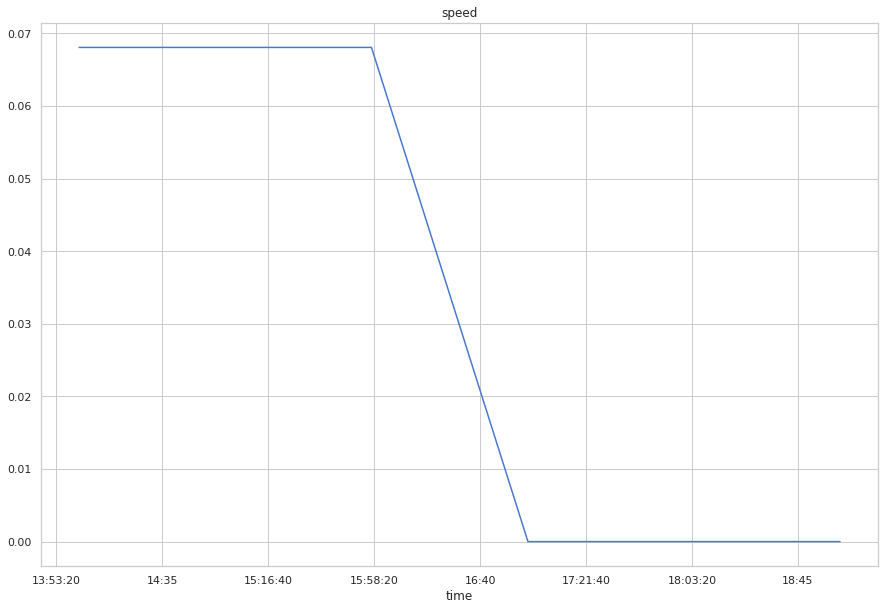

200
False
(5306, 3)


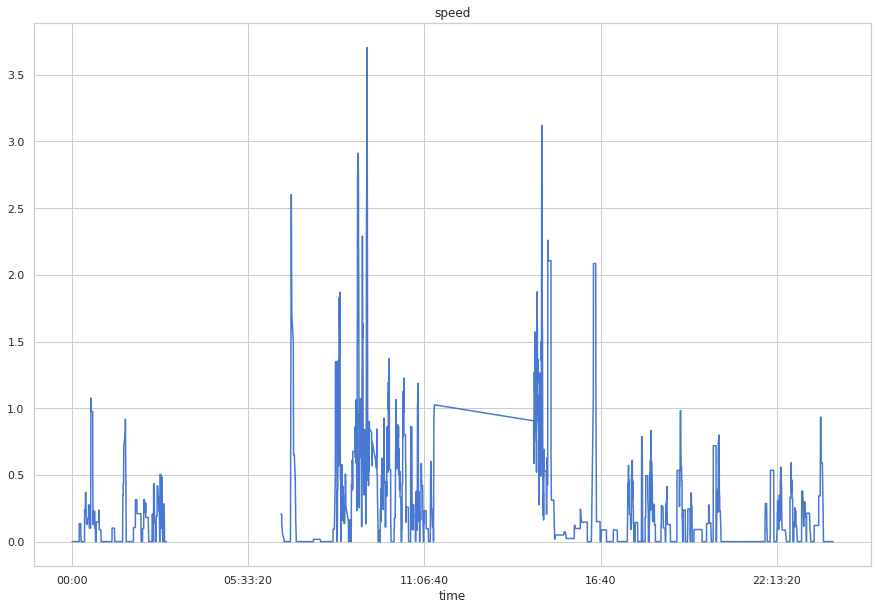

200
False
(294, 3)


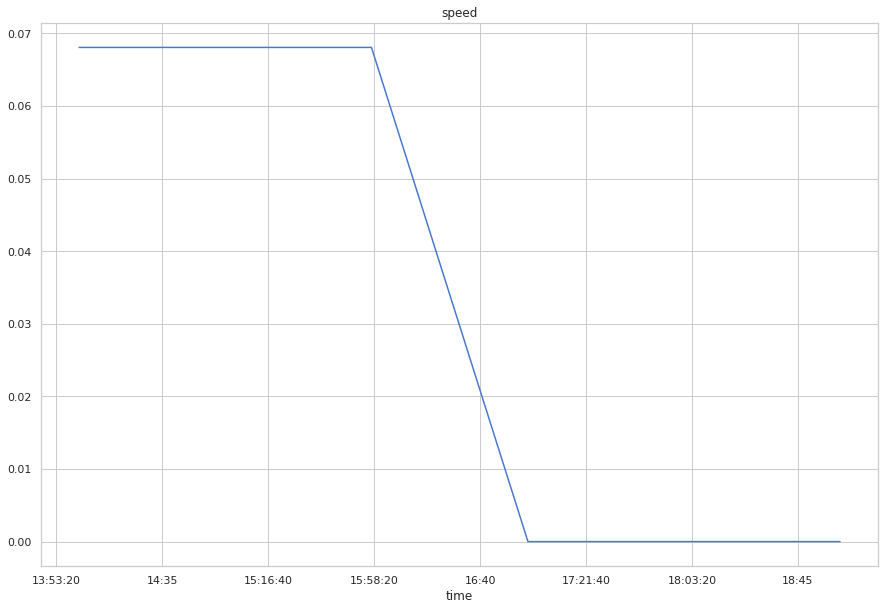

200
False
(0, 0)
200
False
(5306, 3)


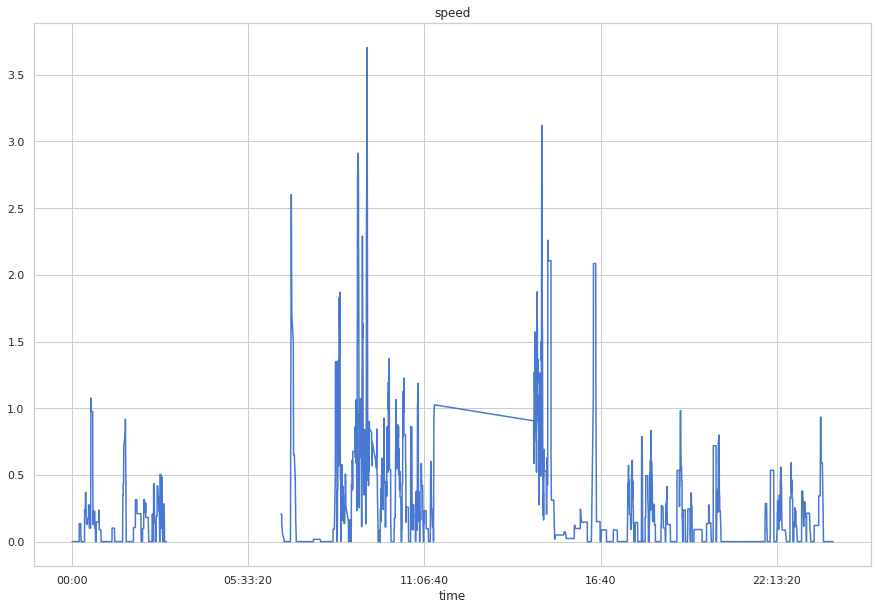

In [28]:
for trip, participant, date in user_trips:
    # convert date format
    old_date = date.split("/")
    new_date = old_date[2] + "-" + old_date[0].zfill(2) + "-"+ old_date[1]
    
    # import data
    endpoint = f'https://api.gometroapp.com/uma/v1/participants/{participant}/events/{new_date}'
    response = requests.get(endpoint, headers=headers)
    print(response.status_code)
    print(response.status_code >= 300)
    
    if (response.status_code < 200) or (response.status_code >= 300):
        raise ValueError('GET /tasks/ {}'.format(resp.status_code))
    
    dataset = pd.DataFrame(response.json())
    print(dataset.shape)
    
    # check that there is data
    if dataset.shape[0] == 0:
        continue
    
    # get waypoints data
    dataset = dataset[dataset['type'] == 'LocationChanged']
    dataset = unpack_payload(dataset)
    dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])
    dataset['time'] = dataset['timestamp'].dt.time
    dataset = dataset.set_index('time')
    
    smooth_cols = [col for col
              in dataset.select_dtypes(include='float64').columns
              if col not in ['latitude', 'longitude']]
    
    # prepare data
    for col in ['accuracy', 'bearing', 'speed']:
        dataset[col] = dataset[col].rolling(window=12).mean()
        
         
    # create figures
    kind='line'
    dataset[col].plot(kind=kind)
    plt.title(col)
    plt.savefig(f'{col}_{kind}.png')
    plt.show()
    

for `add_feat` function to work it requires the following:

```python
['lat','long', 'null', 'alt' ,'DateTime','Date','Time']
```

unpackaced payload *UMA REST API*:

```python
['timestamp', 'provider', 'latitude', 'longitude', 'accuracy', 'bearing', 'speed']
```

unpacked payload adjusted for `add_feat` function:

```python
new_columns = ['latitude', 'longitude', 'accuracy', 'provider', 'timestamp']
```




output of add feat (using MS Geolive data):
```python
['lat', 'long', 'null', 'alt', 'DateTime', 'Date', 'Time', 'lat_shift',
'long_shift', 'time_shift', 'speed', 'speed_shift', 'acceleration',
'acceleration_shift', 'jerk', 'jerk_shift', 'y', 'x', 'bearing',
'brearing_shift', 'bearing_rate', 'distance']
```

calculate cummulative acceleration:
```python
# example
df['cumm_acceleration'] = df['acceleration'].cumsum()

```

columns required to visualise for stop detection analysis - Make `timestamp` the index columns
```python
viz_cols = ['timestamp', 'cumm_acceleration', 'bearing', 'acceleration', 'speed', 'latitude', 'longitude', 'accuracy', 'provider', 'distance']
```


In [ ]:
viz_cols = ['timestamp', 'cumm_acceleration', 'bearing', 'acceleration', 'speed', 'latitude', 'longitude', 'accuracy', 'provider', 'distance']



[Changing Columns Sample Code](https://stackoverflow.com/questions/41968732/set-order-of-columns-in-pandas-dataframe/41968825)
```python
import pandas as pd
frame = pd.DataFrame({
    'one thing': [1, 2, 3, 4],
    'other thing': ['a', 'e', 'i', 'o'],
    'more things': ['a', 'e', 'i', 'o'],
    'second thing': [0.1, 0.2, 1, 2],
})

cols_to_order = ['one thing', 'second thing']
new_columns = cols_to_order + (frame.columns.drop(cols_to_order).tolist())
frame = frame[new_columns]

   one thing  second thing other thing more things
0          1           0.1           a           a
1          2           0.2           e           e
2          3           1.0           i           i
3          4           2.0           o           o
```

Outline for generating plots in python:

1. get list of `trips`
    * `trip_id`
    * `participant_id`
    * `date`
    * `start_time`
    * `end_time`
1. for each of the `trips`
    1. does `<participant_id>` directory exist in `raw_user_visualization` directory?
        1. if so then make this is the directory to perform the work in (`work_dir`)
        1. if not then create a new directory (`<participant_id>`) and then do as above
    1. does regex(`date*.png`) file exist in `work_dir`?
        1. if so then go to next loop iteration (use `continue`)
        1. try to get data for the date of the trip (function below) then...
            * Function: (`get_raw_trip`)
                * input (*str*): get payload request
                * output (*DataFrame*): the necerary data
                    * only data for date of the trip
                    * only waypoint change data
            1. ...then generate a figure(s) for the trip  (function below)
                * Function: (`make_analysis_plot`)
                    * inputs
                        * `df` (*pandas.DataFrame*): a table with the raw trip data
                        * `col` (*str*):  name of column to visualise over time
                        * `kind` (*str*): name of plot visualise
                        * `figures_dir` (*str*): name of directory in the `participant_id` sub-dirs in 
                        * `participant_id` (*str*): 
                        * `date` (*str*): name of file
                    * outputs
                        * Visualisation:
                            * size: TBD (big enough to show minutes clearly over 24 Hours)
                            * Title: "{`col`} profile over time on {`date`}"
                            * y_label: "{`col`}_`<units>`"
                            * x_label: "time"
                            * x_ticks: 1 min interval
                        * file_path: "{`figures_dir`}/{`participant_id`}/{`date`}_{`col`}_vs_{`time`}"     
        1. if not then do we have a valid token to access data from the API? (function below)
            * function: (`is_token_valid`)
                * input: API request
                * output: valid or not (*boolean*)

            1. if so then go to next step (use `continue`)
            1. if not then get a valid token (function below) then do as above
                * function: (`get_valid_token`)
                    * input: API request
                    * output: token (*str*)
                    



build a function, `make_analysis_plot`, that generates a plot for analysis

inputs
* `df` (*pandas.DataFrame*): a table with the raw trip data
* `col` (*str*):  name of column to visualise over time
* `kind` (*str*): name of plot visualise
    - Default = 'line'
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot
    - 'hexbin' : hexbin plot.

* `figures_dir` (*str*): name of directory in the `participant_id` sub-dirs in 
* `participant_id` (*str*): 
* `date` (*str*): name of file
    
    
    
outputs
* Visualisation:
    * size: TBD (big enough to show minutes clearly over 24 Hours)
    * Title: "{`col`} profile over time on {`date`}"
    * y_label: "{`col`}_`<units>`"
    * x_label: "time"
    * x_ticks: 1 min interval
* file_path: "{`figures_dir`}/{`participant_id`}/{`date`}_{`col`}_vs_{`time`}"

In [29]:
def add_label_units(label):
    """
    This function generates a label with units
    ------------------------------------
    Parameters:
        label (str): column name of field we want units for
    
    Returns:
        (str): column name of field with the units such that '<label> (<unit>)'
    ------------------------------------
    Example:
    
    """
    
    # define dictionary of units for known column names
    units_dict = {'speed': 'm/s',
                  'acceleration': 'm/$s^{2}$',
                  'cumm_acceleration': 'm/$s^{2}$',
                  'bearing': '$&deg;$',
                  'latitude': '$&deg;$',
                  'longitude': '$&deg;$',
                  'accuracy': 'm',
                  'distance': 'm'
                  }
    
    # return units for known column names
    if label in units_dict.keys():
        return f'{label} [{units_dict[label]}]'
    
    # return label for unknown colum names
    return label

In [30]:
add_label_units('speed')

'speed [m/s]'

In [31]:
def raw_trip_analysis_plot(df, col, participant_id, date,
                           figures_dir='../../resources/reports/figures/raw_data_viz/'):
    
    # 1. set size of figure
    fig, ax = plt.subplots(figsize=(400,10))
    
    
    # 2. plot figure
    ax.plot(df_waypoints.loc[date][col], linestyle='-', color='b')

                        
    # 3. format figure
    # 3.1 set title of figure
    ax.set_title(f"{col} profile over time on {date}")
    
    # 3.2 set y_label
    ax.set_ylabel(add_label_units(col))
    
    # 3.3 set x_label
    ax.set_xlabel('time [24hrs]')
    
    # 3.4 set x-axis ticks to 1 min intervals
    xlocator = mdates.MinuteLocator(interval = 1)
    ax.xaxis.set_major_locator(xlocator)
    
    ## Format xtick labels as HH:MM
    xformatter = mdates.DateFormatter('%H:%M')
    plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
    
    # plt.xticks(rotation=90)
    plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
    
    # 4. define path
    file_path = f"{figures_dir}{participant_id}/{date}_{col}_vs_time"
    
    # 5 save figure
    plt.savefig(file_path)
    
    # 6 display figure
    plt.show()

In [20]:
# get data
endpoint = 'https://api.gometroapp.com/uma/v1/participants/9c3e37e8-5b51-463c-8688-4452e0c39dbf/events/2021-01-12'
response = requests.get(endpoint, headers=headers)
import pandas as pd
df = pd.DataFrame(response.json())

In [21]:
dir = os.path.join("C:\\","temp","python")
if not os.path.exists(dir):
    os.mkdir(dir)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\/temp/python'

In [ ]:
import pandas as pd
df = pd.DataFrame(response.json())
print(df.shape)
df.head()

In [ ]:
import matplotlib.dates as mdates
mdates??

In [ ]:
fig, ax = plt.subplots()

ax.plot(opsd_daily.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))